In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import seaborn as sns
import time

%matplotlib inline

[nltk_data] Downloading package stopwords to /Users/jay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
tweets = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names = ['label','id','date','noquery','handler','tweet'])

In [3]:
tweets.head()

,label,id,date,noquery,handler,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
tweets[tweets['handler']=='jtmal0723']

,label,id,date,noquery,handler,tweet
430,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm
500,0,1467936498,Mon Apr 06 22:53:39 PDT 2009,NO_QUERY,jtmal0723,@Anistorm Sorry
1733,0,1468219521,Tue Apr 07 00:22:07 PDT 2009,NO_QUERY,jtmal0723,@jmielcarz send some of that warmness my way.....
37902,0,1573108534,Mon Apr 20 23:45:17 PDT 2009,NO_QUERY,jtmal0723,@Anistorm what's wrong?
261409,0,1985909023,Sun May 31 18:00:15 PDT 2009,NO_QUERY,jtmal0723,likes that it is windy at work so he isn't as ...
606365,0,2222571467,Thu Jun 18 07:09:49 PDT 2009,NO_QUERY,jtmal0723,@twckellycass the light at the video wall is r...
866347,4,1677596948,Sat May 02 02:57:06 PDT 2009,NO_QUERY,jtmal0723,"@TWCWeekends Happy 27th birthday, you guys"
1288967,4,2002549306,Tue Jun 02 04:31:54 PDT 2009,NO_QUERY,jtmal0723,@YourWxToday other than a few burnt out lights...


In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
label      1600000 non-null int64
id         1600000 non-null int64
date       1600000 non-null object
noquery    1600000 non-null object
handler    1600000 non-null object
tweet      1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
tweets.drop(['id', 'date','noquery','handler'], axis=1, inplace=True)

In [7]:
tweets.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
tweets.groupby('label').describe()

tweet                                        
        count  unique                        top freq
label                                                
0      800000  790185  isPlayer Has Died! Sorry   210
4      800000  793506              good morning   118

In [9]:
tweets['length'] = tweets['tweet'].apply(len)
tweets.head()

,label,tweet,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [10]:
tweets['label'].value_counts()

4    800000
0    800000
Name: label, dtype: int64

In [11]:

tweets['label'] = tweets['label'].map({0: 0, 4: 1})

In [12]:
tweets.length.describe()

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: length, dtype: float64

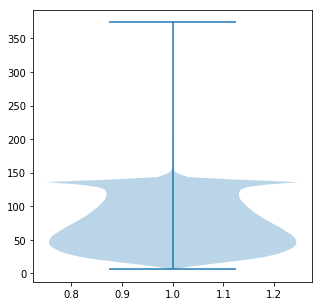

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.violinplot(tweets['length'])
plt.show()

In [14]:
tweets[tweets['length'] == 374]['tweet']

1295281    @catfish_ohm à¹à¸à¹à¸²à¹à¸«à¹à¸?à¸²à¸£à¹...
Name: tweet, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x104811f60>,
      dtype=object)

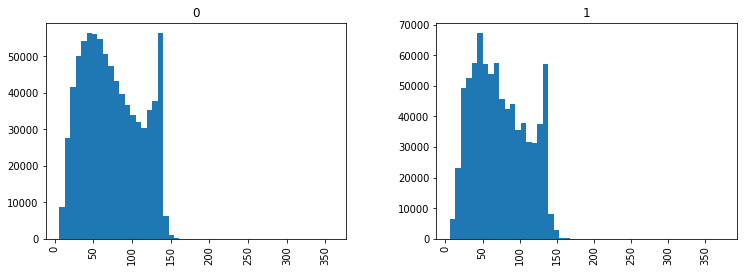

In [15]:
tweets.hist(column='length', by='label', bins=50,figsize=(12,4))

In [16]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
from bs4 import BeautifulSoup
import re

In [17]:
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    from nltk.stem import WordNetLemmatizer
    lemmer=WordNetLemmatizer()
    words=[' '.join([lemmer.lemmatize(word) for word in text.split(' ')]) for text in words]
    return (" ".join(words)).strip()

In [18]:
%%time
print("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(tweets)):
    if( (i+1)%100000 == 0 ):
        print ("Tweets %d of %d has been processed" %(i+1,len(tweets)))                                                                    
    clean_tweet_texts.append(tweet_cleaner_updated(tweets['tweet'][i]))

Cleaning the tweets...

Tweets 100000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 300000 of 1600000 has been processed
Tweets 400000 of 1600000 has been processed
Tweets 500000 of 1600000 has been processed
Tweets 600000 of 1600000 has been processed
Tweets 700000 of 1600000 has been processed
Tweets 800000 of 1600000 has been processed
Tweets 900000 of 1600000 has been processed
Tweets 1000000 of 1600000 has been processed
Tweets 1100000 of 1600000 has been processed
Tweets 1200000 of 1600000 has been processed
Tweets 1300000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1600000 of 1600000 has been processed
CPU times: user 12min 40s, sys: 34 s, total: 13min 14s
Wall time: 13min 54s


In [19]:
len(clean_tweet_texts)

1600000

In [20]:
clean_tweets = pd.DataFrame(clean_tweet_texts,columns=['clean tweet'])
clean_tweets['label'] = tweets['label']

In [21]:
clean_tweets['label'].value_counts()

1    800000
0    800000
Name: label, dtype: int64

In [22]:
clean_tweets.to_csv('clean_tweet.csv',encoding='utf-8')

In [23]:
csv = 'clean_tweet.csv'
clean_tweets = pd.read_csv(csv,index_col=0)
clean_tweets.head()

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,clean tweet,label
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many time for the ball managed to save t...,0
3,my whole body feel itchy and like it on fire,0
4,no it not behaving at all mad why am here beca...,0


In [24]:
clean_tweets.head()

,clean tweet,label
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many time for the ball managed to save t...,0
3,my whole body feel itchy and like it on fire,0
4,no it not behaving at all mad why am here beca...,0


In [25]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
clean tweet    1596041 non-null object
label          1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


In [26]:
clean_tweets[clean_tweets.isnull().any(axis=1)].head()

,clean tweet,label
208,NaN,0
249,NaN,0
282,NaN,0
398,NaN,0
430,NaN,0


In [27]:
np.sum(clean_tweets.isnull().any(axis=1))

3959

In [28]:
clean_tweets.isnull().any(axis=0)

clean tweet     True
label          False
dtype: bool

It seems like 3,959 entries have null entries for the text column. This is strange, because the original dataset had no null entries, and if there are any null entries in the cleaned dataset, it must have happened during the cleaning process.

In [29]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding = 'latin-1',header=None)
df.iloc[clean_tweets[clean_tweets.isnull().any(axis=1)].index,:].head()

,0,1,2,3,4,5
208,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,NO_QUERY,Artiel87,@mandayyy
249,0,1467874569,Mon Apr 06 22:36:27 PDT 2009,NO_QUERY,Artiel87,@mandayyy
282,0,1467881474,Mon Apr 06 22:38:20 PDT 2009,NO_QUERY,__Susan__,@ITS_NEMESIS -------
398,0,1467912842,Mon Apr 06 22:46:53 PDT 2009,NO_QUERY,KimberlyKane,@danadearmond
430,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm


By looking at these entries in the original data, it seems like only text information they had was either twitter ID or it could have been URL address. Anyway, these are the info we decided to discard for the sentiment analysis, so we will drop these null rows, and update the data frame.

In [30]:
clean_tweets.dropna(inplace=True)
clean_tweets.reset_index(drop=True,inplace=True)
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
clean tweet    1596041 non-null object
label          1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [31]:
clean_tweets['label'].value_counts()

0    798197
1    797844
Name: label, dtype: int64

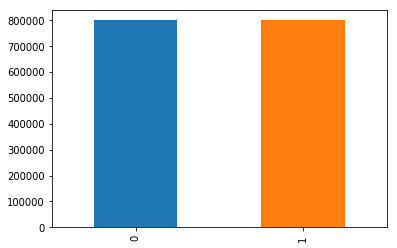

In [32]:
clean_tweets['label'].value_counts().plot(kind = 'bar')

In [33]:
clean_tweets['length'] = clean_tweets['clean tweet'].apply(len)

In [34]:
clean_tweets.length.describe() #max is 140 now

count    1.596041e+06
mean     5.928591e+01
std      3.245402e+01
min      1.000000e+00
25%      3.200000e+01
50%      5.500000e+01
75%      8.500000e+01
max      1.400000e+02
Name: length, dtype: float64

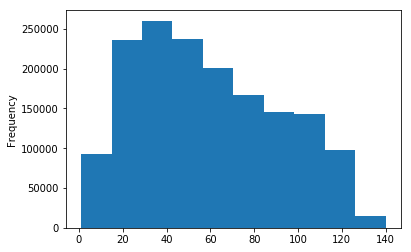

In [35]:
clean_tweets['length'].plot(kind='hist')

## Word Cloud
A word cloud represents word usage in a document by resizing individual words proportionally to its frequency and then presenting them in a random arrangement.Some of the concerns over word cloud is that, it supports only the crudest sorts of textual analysis, and it is often applied to situations where textual analysis is not appropriate, and it leaves viewers to figure out the context of the data by themselves without providing the narrative.

But in the case of tweets, textual analysis is the most important analysis, and it provides a general idea of what kind of words are frequent in the corpus, in a sort of quick and dirty way.

In [36]:
neg_tweets = clean_tweets[clean_tweets['label'] == 0]
neg_string = []
for t in neg_tweets['clean tweet']:
     neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

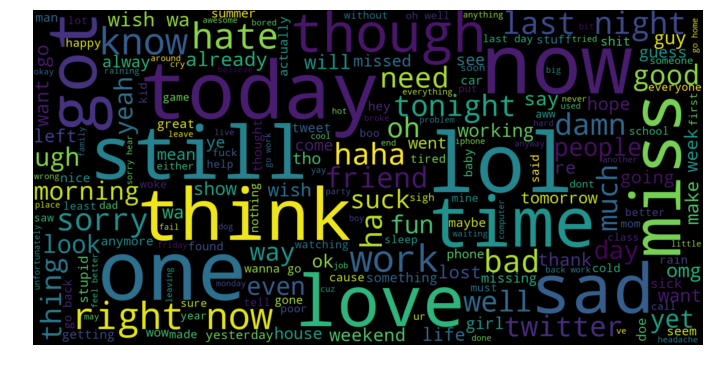

In [37]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Some of big words can be interpreted quite neutral, such as “today”,”now”,etc. We can see some of the words in smaller size make sense to be in negative tweets, such as “damn”,”ugh”,”miss”,”bad”, etc. But there is “love” in rather big size, so we wanted to see what is happening.

In [38]:
for t in tweets[tweets['label']==0]['tweet'][:200]:
    if 'love' in t:
        print(t)

@LettyA ahh ive always wanted to see rent  love the soundtrack!!
@julieebaby awe i love you too!!!! 1 am here  i miss you
@mercedesashley Damn! The grind is inspirational and saddening at the same time.  Don't want you to stop cuz I like what u do! Much love
I'm missing you babe..  but as long as your alive I'm happy.. Yawwwnn.. I'm tired my love imma try to sleep hopefully you had a headstart
@robluketic  love the french. I tell people here in the south i'm qtr. french and they snarl at me.  french are beautiful people


Even though the tweets contain the word “love”, in these cases it is negative sentiment, because the tweet has mixed emotions like “love” but “miss”. Or sometimes used in a sarcastic way.

In [39]:
pos_tweets = clean_tweets[clean_tweets['label'] == 1]
pos_string = []
for t in pos_tweets['clean tweet']:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

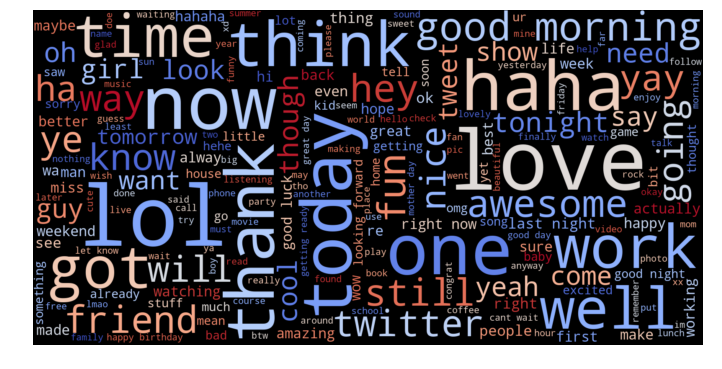

In [40]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap= 'coolwarm').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [41]:
from sklearn.utils import shuffle
clean_tweets = shuffle(clean_tweets)

In [42]:
clean_tweets.head()
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596041 entries, 355673 to 841667
Data columns (total 3 columns):
clean tweet    1596041 non-null object
label          1596041 non-null int64
length         1596041 non-null int64
dtypes: int64(2), object(1)
memory usage: 48.7+ MB


## Preparion for data visualisation
In order to implement a couple of data visualisation in the next step, We need term frequency data. What kind of words are used in the tweets, and how many times it is used in entire corpus. We used count vectorizer to calculate the term frequencies.

There are parameter options available for count vectorizer, such as removing stop words, limiting the maximum number of terms. However, in order to get a full picture of the dataset first.

## Here, We implemented with stop words included, and not limiting the maximum number of features.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(clean_tweets['clean tweet'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [44]:
len(cvec.get_feature_names()) #count vectorizer has extracted 253020 words out of the corpus

253020

In [45]:
neg_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 0]['clean tweet'])
pos_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 1]['clean tweet'])
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [46]:
term_freq_df.head()

,0,1
aa,161,96
aaa,94,56
aaaa,45,29
aaaaa,26,12
aaaaaa,16,12


In [47]:
term_freq_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253020 entries, aa to zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
Data columns (total 2 columns):
0    253020 non-null int64
1    253020 non-null int64
dtypes: int64(2)
memory usage: 5.8+ MB


In [48]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313162,252567,565729
the,257836,265998,523834
it,182969,167030,349999
my,190775,125955,316730
and,153958,149642,303600
you,103844,198245,302089
not,194724,86861,281585
is,133432,111191,244623
in,115614,101223,216837
for,98999,117369,216368


In [331]:
len(term_freq_df)

253020

Text(0.5,1,'Top 300 tokens in tweets')

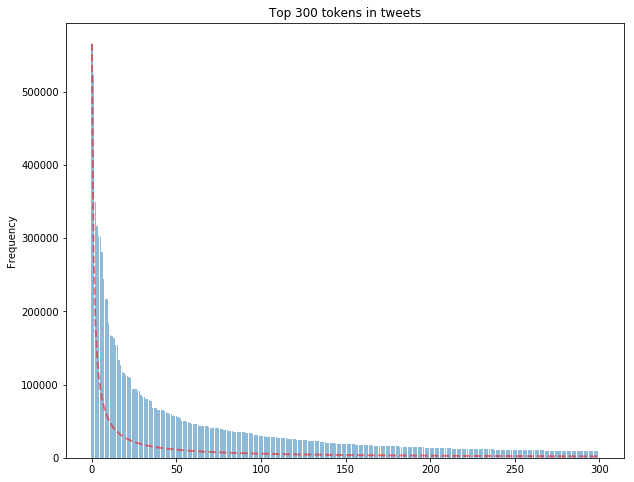

In [340]:
y_pos = np.arange(300)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:300], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 300 tokens in tweets')

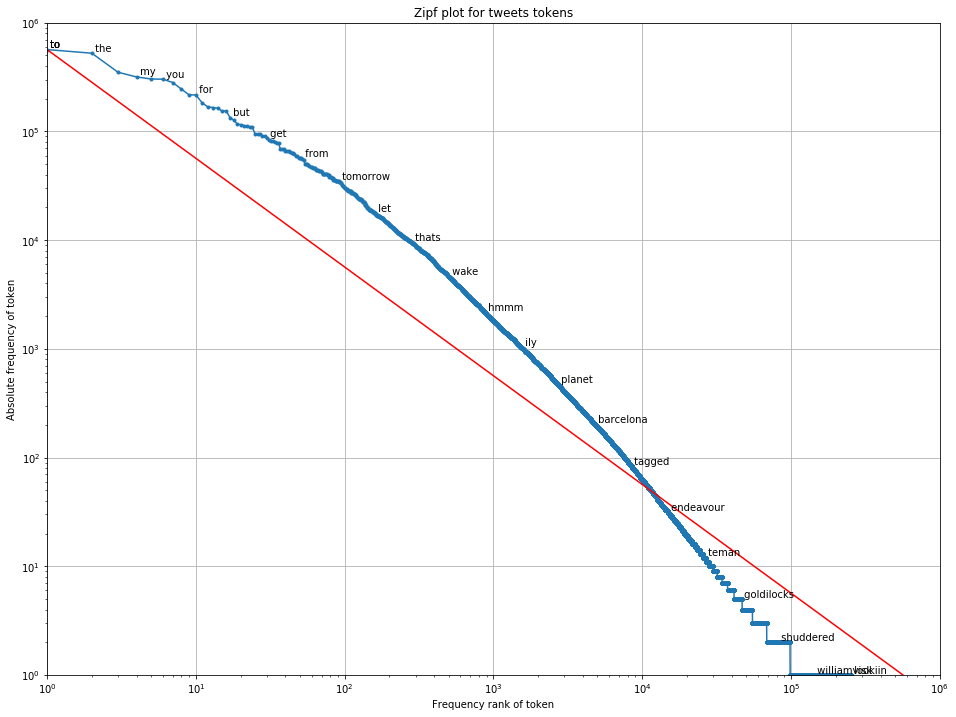

In [349]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(16,12))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], verticalalignment="bottom", horizontalalignment="left")


## Now, We implemented without stop words, and limiting the maximum number of features to 10000
This time, the stop words will not help much, because of the same high-frequency words, such as "the", "to", will equally frequent in both classes. If these stop words dominate both of the classes, We won't be able to have a meaningful result.

In [49]:
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(clean_tweets['clean tweet'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [50]:
neg_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 0]['clean tweet'])
pos_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 1]['clean tweet'])
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [51]:
term_freq_df2.head()

,0,1
aa,161,96
aaa,94,56
aaaa,45,29
aaaaah,35,31
aaaah,76,61


In [52]:
term_freq_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, aa to zzzzzz
Data columns (total 2 columns):
0    10000 non-null int64
1    10000 non-null int64
dtypes: int64(2)
memory usage: 234.4+ KB


In [53]:
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
just,64004,62944,126948
wa,63108,47277,110385
day,52151,56920,109071
good,29251,62189,91440
like,41534,38365,79899
today,38362,30341,68703
work,46946,21698,68644
love,17825,50404,68229
time,31417,34370,65787
going,33690,30942,64632


In [54]:
df_sample100k = pd.DataFrame(columns = ['naive bayes', 'linear regression','logistic regression', 'random forest', 'svm'], index = ['time_with_tfidf','time_without_tfidf', 'accuracy_with_tfidf','accuracy_without_tfidf'])

df_sample80k = pd.DataFrame(columns = ['naive bayes', 'linear regression','logistic regression', 'random forest', 'svm'], index = ['time_with_tfidf','time_without_tfidf', 'accuracy_with_tfidf','accuracy_without_tfidf'])

df_sample60k = pd.DataFrame(columns = ['naive bayes', 'linear regression','logistic regression', 'random forest', 'svm'], index = ['time_with_tfidf','time_without_tfidf', 'accuracy_with_tfidf','accuracy_without_tfidf'])

df_sample10000 = pd.DataFrame(columns = ['naive bayes', 'linear regression','logistic regression', 'random forest', 'svm'], index = ['time_with_tfidf','time_without_tfidf', 'accuracy_with_tfidf','accuracy_without_tfidf'])

In [55]:
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,NaN,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [56]:
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,NaN,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [57]:
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,NaN,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [58]:
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,NaN,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Null Accuracy (Baseline Model)

## Sample of 10,000 datapoints

In [59]:
clean_tweets_sample10000 = clean_tweets.sample(n=10000, random_state=101)
from sklearn.model_selection import train_test_split
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nullaccuracy=max(y_test.mean(), y_test.mean())
print("Null Accuracy : ",nullaccuracy)

Null Accuracy :  0.501


In [60]:
clean_tweets_sample10000['label'].value_counts()

0    5065
1    4935
Name: label, dtype: int64

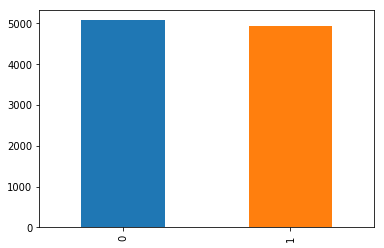

In [61]:
clean_tweets_sample10000['label'].value_counts().plot(kind  = 'bar')

## Sample of 60k datapoints

In [62]:
clean_tweets_sample60k = clean_tweets.sample(n=60000, random_state=101)
from sklearn.model_selection import train_test_split
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nullaccuracy=max(y_test.mean(), y_test.mean())
print("Null Accuracy : ",nullaccuracy)

Null Accuracy :  0.49794444444444447


In [63]:
clean_tweets_sample60k['label'].value_counts()

0    30042
1    29958
Name: label, dtype: int64

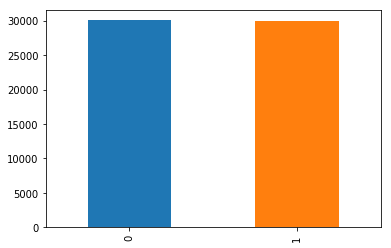

In [64]:
clean_tweets_sample60k['label'].value_counts().plot(kind  = 'bar')

## Sample of 80k datapoints

In [65]:
clean_tweets_sample80k = clean_tweets.sample(n=80000, random_state=101)
from sklearn.model_selection import train_test_split
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nullaccuracy=max(y_test.mean(), y_test.mean())
print("Null Accuracy : ",nullaccuracy)

Null Accuracy :  0.5017083333333333


In [66]:
clean_tweets_sample80k['label'].value_counts()

0    40035
1    39965
Name: label, dtype: int64

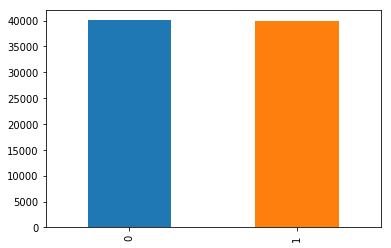

In [67]:
clean_tweets_sample80k['label'].value_counts().plot(kind  = 'bar')

## Sample of 100k datapoints

In [68]:
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
from sklearn.model_selection import train_test_split
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nullaccuracy=max(y_test.mean(), y_test.mean())
print("Null Accuracy : ",nullaccuracy)

Null Accuracy :  0.5010666666666667


In [69]:
clean_tweets_sample100k['label'].value_counts()

0    50044
1    49956
Name: label, dtype: int64

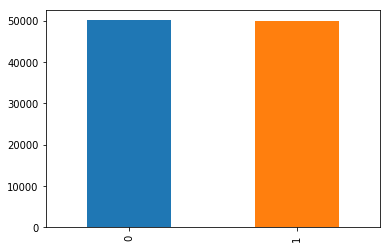

In [70]:
clean_tweets_sample100k['label'].value_counts().plot(kind  = 'bar')

## Naive bayes with TF IDF - Sample of 10000

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
from sklearn.model_selection import train_test_split
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [75]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['naive bayes']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [76]:
predictions = pipeline.predict(X_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.67      0.79      0.72      1497
          1       0.75      0.60      0.67      1503

avg / total       0.71      0.70      0.70      3000



[[1189  308]
 [ 595  908]]
0.699


In [78]:
df_sample10000['naive bayes']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.699,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Naive bayes without TF IDF - Sample of 10000

In [79]:
cv = CountVectorizer(stop_words='english',max_features=10000)

In [80]:
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)
nb = MultinomialNB()

In [82]:
t1 = time.clock()
print(t1)
nb.fit(X_train,y_train)
t2 = time.clock()
print(t2)
t3 =float(t2-t1)
df_sample10000['naive bayes']['time_without_tfidf'] = t3
df_sample10000.head()

1083.797116
1083.806209


,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,NaN,NaN,NaN,NaN
time_without_tfidf,0.009093,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.699,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [83]:
predictions = nb.predict(X_test)

In [84]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[43 15]
 [11 31]]
             precision    recall  f1-score   support

          0       0.80      0.74      0.77        58
          1       0.67      0.74      0.70        42

avg / total       0.74      0.74      0.74       100

0.74


In [85]:
df_sample10000['naive bayes']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,NaN,NaN,NaN,NaN
time_without_tfidf,0.009093,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.699,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.74,NaN,NaN,NaN,NaN


## Linear Regression with TF IDF Sample of 10,000

In [86]:
from sklearn.linear_model import LinearRegression
# clean_tweets_sample10000 = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [88]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearRegression()),  # train on TF-IDF vectors w/ Linear Regression classifier
])

In [89]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['linear regression']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,1.76934,NaN,NaN,NaN
time_without_tfidf,0.009093,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.699,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.74,NaN,NaN,NaN,NaN


In [90]:
predictions = pipeline.predict(X_test)

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))
# rpredictions = predictions.astype()
# print (classification_report(y_test,rpredictions))
# print ('\n')
# print (confusion_matrix(y_test,rpredictions))
# print("Accuracy is", accuracy_score(y_test,predictions))

Mean Absolute error:  0.7227928524617384
Mean Squared error:  1.0222456994610924
R2 Score:  -3.0889991538409856


## Linear Regression without TF IDF - Sample of 10,000

In [92]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()

In [93]:
t1 = time.process_time()
lr.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['linear regression']['time_without_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,1.76934,NaN,NaN,NaN
time_without_tfidf,0.009093,2.08352,NaN,NaN,NaN
accuracy_with_tfidf,0.699,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.74,NaN,NaN,NaN,NaN


In [94]:
predictions = lr.predict(X_test)

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))

Mean Absolute error:  0.824792329115111
Mean Squared error:  1.339052089847611
R2 Score:  -4.3562297843095825


## Logistic Regression with TF IDF - Sample of 10,000

In [96]:
from sklearn.linear_model import LogisticRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [97]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [98]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['logistic regression']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,1.76934,0.329564,NaN,NaN
time_without_tfidf,0.009093,2.08352,NaN,NaN,NaN
accuracy_with_tfidf,0.699,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.74,NaN,NaN,NaN,NaN


In [99]:
predictions = pipeline.predict(X_test)

In [100]:
print (classification_report(y_test,predictions.round()))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.70      0.73      0.71      1497
          1       0.72      0.69      0.70      1503

avg / total       0.71      0.71      0.71      3000



[[1090  407]
 [ 472 1031]]
Accuracy is 0.707


In [101]:
df_sample10000['logistic regression']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,1.76934,0.329564,NaN,NaN
time_without_tfidf,0.009093,2.08352,NaN,NaN,NaN
accuracy_with_tfidf,0.699,NaN,0.707,NaN,NaN
accuracy_without_tfidf,0.74,NaN,NaN,NaN,NaN


## Logistic Regression without TF IDF - Sample of 10,000

In [102]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()

In [103]:
t1 = time.process_time()
log_model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['logistic regression']['time_without_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,1.76934,0.329564,NaN,NaN
time_without_tfidf,0.009093,2.08352,0.224854,NaN,NaN
accuracy_with_tfidf,0.699,NaN,0.707,NaN,NaN
accuracy_without_tfidf,0.74,NaN,NaN,NaN,NaN


In [104]:
predictions = log_model.predict(X_test)

In [105]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions.round()))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[1069  428]
 [ 452 1051]]
             precision    recall  f1-score   support

          0       0.70      0.71      0.71      1497
          1       0.71      0.70      0.70      1503

avg / total       0.71      0.71      0.71      3000

Accuracy is:  0.7066666666666667


In [106]:
df_sample10000['logistic regression']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,1.76934,0.329564,NaN,NaN
time_without_tfidf,0.009093,2.08352,0.224854,NaN,NaN
accuracy_with_tfidf,0.699,NaN,0.707,NaN,NaN
accuracy_without_tfidf,0.74,NaN,0.706667,NaN,NaN


## Random Forest Classification with TF IDF - Sample of 10,000

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [109]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [110]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['random forest']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,1.76934,0.329564,0.892326,NaN
time_without_tfidf,0.009093,2.08352,0.224854,NaN,NaN
accuracy_with_tfidf,0.699,NaN,0.707,NaN,NaN
accuracy_without_tfidf,0.74,NaN,0.706667,NaN,NaN


In [111]:
predictions = pipeline.predict(X_test)

In [112]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.67      0.66      0.66      1497
          1       0.67      0.68      0.67      1503

avg / total       0.67      0.67      0.67      3000



[[ 985  512]
 [ 485 1018]]
Accuracy is 0.6676666666666666


In [113]:
df_sample10000['random forest']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,1.76934,0.329564,0.892326,NaN
time_without_tfidf,0.009093,2.08352,0.224854,NaN,NaN
accuracy_with_tfidf,0.699,NaN,0.707,0.667667,NaN
accuracy_without_tfidf,0.74,NaN,0.706667,NaN,NaN


## Random Forest Classification without TF IDF - Sample of 10,000

In [114]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rf = RandomForestClassifier()

In [115]:
t1 = time.process_time()
rf.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['random forest']['time_without_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,1.76934,0.329564,0.892326,NaN
time_without_tfidf,0.009093,2.08352,0.224854,1.76275,NaN
accuracy_with_tfidf,0.699,NaN,0.707,0.667667,NaN
accuracy_without_tfidf,0.74,NaN,0.706667,NaN,NaN


In [116]:
predictions = rf.predict(X_test)

In [117]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[1055  442]
 [ 532  971]]
             precision    recall  f1-score   support

          0       0.66      0.70      0.68      1497
          1       0.69      0.65      0.67      1503

avg / total       0.68      0.68      0.68      3000

Accuracy is:  0.6753333333333333


In [118]:
df_sample10000['random forest']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,1.76934,0.329564,0.892326,NaN
time_without_tfidf,0.009093,2.08352,0.224854,1.76275,NaN
accuracy_with_tfidf,0.699,NaN,0.707,0.667667,NaN
accuracy_without_tfidf,0.74,NaN,0.706667,0.675333,NaN


## Support Vector Machines with TF IDF - Sample of 10,000

In [119]:
from sklearn.svm import SVC
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [121]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM classifier
])

In [122]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['svm']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,1.76934,0.329564,0.892326,6.09322
time_without_tfidf,0.009093,2.08352,0.224854,1.76275,NaN
accuracy_with_tfidf,0.699,NaN,0.707,0.667667,NaN
accuracy_without_tfidf,0.74,NaN,0.706667,0.675333,NaN


In [123]:
predictions = pipeline.predict(X_test)

In [124]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67      1497
          1       0.00      0.00      0.00      1503

avg / total       0.25      0.50      0.33      3000



[[1497    0]
 [1503    0]]
Accuracy is 0.499


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [125]:
df_sample10000['svm']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,1.76934,0.329564,0.892326,6.09322
time_without_tfidf,0.009093,2.08352,0.224854,1.76275,NaN
accuracy_with_tfidf,0.699,NaN,0.707,0.667667,0.499
accuracy_without_tfidf,0.74,NaN,0.706667,0.675333,NaN


## Support Vector Machines without tfidf - Sample of 10,000

In [126]:
model = SVC()

In [127]:
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [128]:
t1 = time.process_time()
model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['svm']['time_without_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,1.76934,0.329564,0.892326,6.09322
time_without_tfidf,0.009093,2.08352,0.224854,1.76275,5.76299
accuracy_with_tfidf,0.699,NaN,0.707,0.667667,0.499
accuracy_without_tfidf,0.74,NaN,0.706667,0.675333,NaN


In [129]:
predictions = model.predict(X_test)

In [130]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[1497    0]
 [1503    0]]
             precision    recall  f1-score   support

          0       0.50      1.00      0.67      1497
          1       0.00      0.00      0.00      1503

avg / total       0.25      0.50      0.33      3000

Accuracy is:  0.499


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [131]:
df_sample10000['svm']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.119672,1.76934,0.329564,0.892326,6.09322
time_without_tfidf,0.009093,2.08352,0.224854,1.76275,5.76299
accuracy_with_tfidf,0.699,NaN,0.707,0.667667,0.499
accuracy_without_tfidf,0.74,NaN,0.706667,0.675333,0.499


## Naive bayes with TF IDF - Sample of 60k

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)

In [133]:
from sklearn.model_selection import train_test_split
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [136]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['naive bayes']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [137]:
predictions = pipeline.predict(X_test)

In [138]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.73      0.75      0.74      9037
          1       0.74      0.71      0.73      8963

avg / total       0.73      0.73      0.73     18000



[[6807 2230]
 [2561 6402]]
0.7338333333333333


In [139]:
df_sample60k['naive bayes']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Naive Bayes without using tfidf - Sample 60k

In [140]:
# cv = CountVectorizer()
cv = CountVectorizer(stop_words='english',max_features=10000)

In [141]:
# X = cv.fit_transform(clean_tweets['clean tweet'])
# y = clean_tweets['label']

X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)
nb = MultinomialNB()

In [143]:
t1 = time.process_time()
nb.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['naive bayes']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,NaN,NaN,NaN,NaN
time_without_tfidf,0.018998,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [144]:
predictions = nb.predict(X_test)

In [145]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[218  72]
 [ 75 235]]
             precision    recall  f1-score   support

          0       0.74      0.75      0.75       290
          1       0.77      0.76      0.76       310

avg / total       0.76      0.76      0.76       600

0.755


In [146]:
df_sample60k['naive bayes']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,NaN,NaN,NaN,NaN
time_without_tfidf,0.018998,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.755,NaN,NaN,NaN,NaN


## Linear Regression with TF IDF Sample of 60k

In [147]:
from sklearn.linear_model import LinearRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [149]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearRegression()),  # train on TF-IDF vectors w/ Linear Regression classifier
])

In [150]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['linear regression']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,4.09121,NaN,NaN,NaN
time_without_tfidf,0.018998,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.755,NaN,NaN,NaN,NaN


In [151]:
predictions = pipeline.predict(X_test)

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))
# rpredictions = predictions.astype()
# print (classification_report(y_test,rpredictions))
# print ('\n')
# print (confusion_matrix(y_test,rpredictions))
# print("Accuracy is", accuracy_score(y_test,predictions))

Mean Absolute error:  0.3804731540912292
Mean Squared error:  0.22059658692071002
R2 Score:  0.11759873864645842


## Linear Regression without TF IDF - Sample of 60k

In [153]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()

In [154]:
t1 = time.process_time()
lr.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['linear regression']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,4.09121,NaN,NaN,NaN
time_without_tfidf,0.018998,4.35248,NaN,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.755,NaN,NaN,NaN,NaN


In [155]:
predictions = lr.predict(X_test)

In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))

Mean Absolute error:  0.41411786210411666
Mean Squared error:  0.25874864165471606
R2 Score:  -0.03501205960046461


## Logistic Regression with TF IDF - Sample of 60k

In [157]:
from sklearn.linear_model import LogisticRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [158]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [159]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['logistic regression']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,4.09121,1.73613,NaN,NaN
time_without_tfidf,0.018998,4.35248,NaN,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.755,NaN,NaN,NaN,NaN


In [160]:
predictions = pipeline.predict(X_test)

In [161]:
print (classification_report(y_test,predictions.round()))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.75      0.74      0.74      9037
          1       0.74      0.76      0.75      8963

avg / total       0.75      0.75      0.75     18000



[[6660 2377]
 [2192 6771]]
Accuracy is 0.7461666666666666


In [162]:
df_sample60k['logistic regression']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,4.09121,1.73613,NaN,NaN
time_without_tfidf,0.018998,4.35248,NaN,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,0.746167,NaN,NaN
accuracy_without_tfidf,0.755,NaN,NaN,NaN,NaN


## Logistic Regression without TF IDF - Sample of 60k

In [163]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()

In [164]:
t1 = time.process_time()
log_model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['logistic regression']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,4.09121,1.73613,NaN,NaN
time_without_tfidf,0.018998,4.35248,2.39685,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,0.746167,NaN,NaN
accuracy_without_tfidf,0.755,NaN,NaN,NaN,NaN


In [165]:
predictions = log_model.predict(X_test)

In [166]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions.round()))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[6578 2459]
 [2244 6719]]
             precision    recall  f1-score   support

          0       0.75      0.73      0.74      9037
          1       0.73      0.75      0.74      8963

avg / total       0.74      0.74      0.74     18000

Accuracy is:  0.7387222222222222


In [167]:
df_sample60k['logistic regression']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,4.09121,1.73613,NaN,NaN
time_without_tfidf,0.018998,4.35248,2.39685,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,0.746167,NaN,NaN
accuracy_without_tfidf,0.755,NaN,0.738722,NaN,NaN


## Random Forest Classification with TF IDF - Sample of 60k

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [170]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [171]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['random forest']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,4.09121,1.73613,9.00614,NaN
time_without_tfidf,0.018998,4.35248,2.39685,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,0.746167,NaN,NaN
accuracy_without_tfidf,0.755,NaN,0.738722,NaN,NaN


In [172]:
predictions = pipeline.predict(X_test)

In [173]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.70      0.73      0.72      9037
          1       0.72      0.68      0.70      8963

avg / total       0.71      0.71      0.71     18000



[[6636 2401]
 [2857 6106]]
Accuracy is 0.7078888888888889


In [174]:
df_sample60k['random forest']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,4.09121,1.73613,9.00614,NaN
time_without_tfidf,0.018998,4.35248,2.39685,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,0.746167,0.707889,NaN
accuracy_without_tfidf,0.755,NaN,0.738722,NaN,NaN


## Random Forest Classification without TF IDF - Sample of 60k

In [175]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rf = RandomForestClassifier()

In [176]:
t1 = time.process_time()
rf.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['random forest']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,4.09121,1.73613,9.00614,NaN
time_without_tfidf,0.018998,4.35248,2.39685,11.1516,NaN
accuracy_with_tfidf,0.733833,NaN,0.746167,0.707889,NaN
accuracy_without_tfidf,0.755,NaN,0.738722,NaN,NaN


In [177]:
predictions = rf.predict(X_test)

In [178]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[6629 2408]
 [2843 6120]]
             precision    recall  f1-score   support

          0       0.70      0.73      0.72      9037
          1       0.72      0.68      0.70      8963

avg / total       0.71      0.71      0.71     18000

Accuracy is:  0.7082777777777778


In [179]:
df_sample60k['random forest']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,4.09121,1.73613,9.00614,NaN
time_without_tfidf,0.018998,4.35248,2.39685,11.1516,NaN
accuracy_with_tfidf,0.733833,NaN,0.746167,0.707889,NaN
accuracy_without_tfidf,0.755,NaN,0.738722,0.708278,NaN


## Support Vector Machines with TF IDF - Sample of 60k

In [180]:
from sklearn.svm import SVC
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [182]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM classifier
])

In [183]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['svm']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,4.09121,1.73613,9.00614,249.228
time_without_tfidf,0.018998,4.35248,2.39685,11.1516,NaN
accuracy_with_tfidf,0.733833,NaN,0.746167,0.707889,NaN
accuracy_without_tfidf,0.755,NaN,0.738722,0.708278,NaN


In [184]:
predictions = pipeline.predict(X_test)

In [185]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67      9037
          1       0.00      0.00      0.00      8963

avg / total       0.25      0.50      0.34     18000



[[9037    0]
 [8963    0]]
Accuracy is 0.5020555555555556


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [186]:
df_sample60k['svm']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,4.09121,1.73613,9.00614,249.228
time_without_tfidf,0.018998,4.35248,2.39685,11.1516,NaN
accuracy_with_tfidf,0.733833,NaN,0.746167,0.707889,0.502056
accuracy_without_tfidf,0.755,NaN,0.738722,0.708278,NaN


## Support Vector Machines without tfidf - Sample of 60k

In [187]:
model = SVC()

In [188]:
X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [189]:
t1 = time.process_time()
model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['svm']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,4.09121,1.73613,9.00614,249.228
time_without_tfidf,0.018998,4.35248,2.39685,11.1516,235.815
accuracy_with_tfidf,0.733833,NaN,0.746167,0.707889,0.502056
accuracy_without_tfidf,0.755,NaN,0.738722,0.708278,NaN


In [190]:
predictions = model.predict(X_test)

In [191]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[9036    1]
 [8955    8]]
             precision    recall  f1-score   support

          0       0.50      1.00      0.67      9037
          1       0.89      0.00      0.00      8963

avg / total       0.69      0.50      0.34     18000

Accuracy is:  0.5024444444444445


In [192]:
df_sample60k['svm']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.755826,4.09121,1.73613,9.00614,249.228
time_without_tfidf,0.018998,4.35248,2.39685,11.1516,235.815
accuracy_with_tfidf,0.733833,NaN,0.746167,0.707889,0.502056
accuracy_without_tfidf,0.755,NaN,0.738722,0.708278,0.502444


## Naive bayes with TF IDF - Sample of 80k

In [193]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)

In [194]:
from sklearn.model_selection import train_test_split
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [196]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [197]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['naive bayes']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [198]:
predictions = pipeline.predict(X_test)

In [199]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.73      0.75      0.74     11959
          1       0.75      0.72      0.74     12041

avg / total       0.74      0.74      0.74     24000



[[9020 2939]
 [3314 8727]]
0.7394583333333333


In [200]:
df_sample80k['naive bayes']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.739458,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Naive Bayes without using tfidf - Sample 80k

In [201]:
# cv = CountVectorizer()
cv = CountVectorizer(stop_words='english',max_features=10000)

In [202]:
# X = cv.fit_transform(clean_tweets['clean tweet'])
# y = clean_tweets['label']

X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)
nb = MultinomialNB()

In [204]:
t1 = time.process_time()
nb.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['naive bayes']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,NaN,NaN,NaN,NaN
time_without_tfidf,0.029523,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.739458,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [205]:
predictions = nb.predict(X_test)

In [206]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[313  90]
 [105 292]]
             precision    recall  f1-score   support

          0       0.75      0.78      0.76       403
          1       0.76      0.74      0.75       397

avg / total       0.76      0.76      0.76       800

0.75625


In [207]:
df_sample80k['naive bayes']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,NaN,NaN,NaN,NaN
time_without_tfidf,0.029523,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.739458,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.75625,NaN,NaN,NaN,NaN


## Linear Regression with TF IDF Sample of 80k

In [208]:
from sklearn.linear_model import LinearRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [210]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearRegression()),  # train on TF-IDF vectors w/ Linear Regression classifier
])

In [211]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['linear regression']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,3.03399,NaN,NaN,NaN
time_without_tfidf,0.029523,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.739458,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.75625,NaN,NaN,NaN,NaN


In [212]:
predictions = pipeline.predict(X_test)

In [213]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))
# rpredictions = predictions.astype()
# print (classification_report(y_test,rpredictions))
# print ('\n')
# print (confusion_matrix(y_test,rpredictions))
# print("Accuracy is", accuracy_score(y_test,predictions))

Mean Absolute error:  0.36742582268858254
Mean Squared error:  0.19862624057721806
R2 Score:  0.20548576284090092


## Linear Regression without TF IDF - Sample of 80k

In [214]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()

In [215]:
t1 = time.process_time()
lr.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['linear regression']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,3.03399,NaN,NaN,NaN
time_without_tfidf,0.029523,4.23639,NaN,NaN,NaN
accuracy_with_tfidf,0.739458,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.75625,NaN,NaN,NaN,NaN


In [216]:
predictions = lr.predict(X_test)

In [217]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))

Mean Absolute error:  0.39646070549739815
Mean Squared error:  0.22677509234189658
R2 Score:  0.09288904137184806


## Logistic Regression with TF IDF - Sample of 80k

In [218]:
from sklearn.linear_model import LogisticRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [219]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [220]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['logistic regression']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,3.03399,2.3019,NaN,NaN
time_without_tfidf,0.029523,4.23639,NaN,NaN,NaN
accuracy_with_tfidf,0.739458,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.75625,NaN,NaN,NaN,NaN


In [221]:
predictions = pipeline.predict(X_test)

In [222]:
print (classification_report(y_test,predictions.round()))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.75      0.73      0.74     11959
          1       0.74      0.76      0.75     12041

avg / total       0.75      0.75      0.75     24000



[[8728 3231]
 [2835 9206]]
Accuracy is 0.74725


In [223]:
df_sample80k['logistic regression']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,3.03399,2.3019,NaN,NaN
time_without_tfidf,0.029523,4.23639,NaN,NaN,NaN
accuracy_with_tfidf,0.739458,NaN,0.74725,NaN,NaN
accuracy_without_tfidf,0.75625,NaN,NaN,NaN,NaN


## Logistic Regression without TF IDF - Sample of 80k

In [224]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()

In [225]:
t1 = time.process_time()
log_model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['logistic regression']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,3.03399,2.3019,NaN,NaN
time_without_tfidf,0.029523,4.23639,2.58709,NaN,NaN
accuracy_with_tfidf,0.739458,NaN,0.74725,NaN,NaN
accuracy_without_tfidf,0.75625,NaN,NaN,NaN,NaN


In [226]:
predictions = log_model.predict(X_test)

In [227]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions.round()))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[8622 3337]
 [2865 9176]]
             precision    recall  f1-score   support

          0       0.75      0.72      0.74     11959
          1       0.73      0.76      0.75     12041

avg / total       0.74      0.74      0.74     24000

Accuracy is:  0.7415833333333334


In [228]:
df_sample80k['logistic regression']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,3.03399,2.3019,NaN,NaN
time_without_tfidf,0.029523,4.23639,2.58709,NaN,NaN
accuracy_with_tfidf,0.739458,NaN,0.74725,NaN,NaN
accuracy_without_tfidf,0.75625,NaN,0.741583,NaN,NaN


## Random Forest Classification with TF IDF - Sample of 80k

In [229]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [231]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [232]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['random forest']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,3.03399,2.3019,16.7622,NaN
time_without_tfidf,0.029523,4.23639,2.58709,NaN,NaN
accuracy_with_tfidf,0.739458,NaN,0.74725,NaN,NaN
accuracy_without_tfidf,0.75625,NaN,0.741583,NaN,NaN


In [233]:
predictions = pipeline.predict(X_test)

In [234]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.70      0.74      0.72     11959
          1       0.72      0.68      0.70     12041

avg / total       0.71      0.71      0.71     24000



[[8815 3144]
 [3802 8239]]
Accuracy is 0.7105833333333333


In [235]:
df_sample80k['random forest']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,3.03399,2.3019,16.7622,NaN
time_without_tfidf,0.029523,4.23639,2.58709,NaN,NaN
accuracy_with_tfidf,0.739458,NaN,0.74725,0.710583,NaN
accuracy_without_tfidf,0.75625,NaN,0.741583,NaN,NaN


## Random Forest Classification without TF IDF - Sample of 80k

In [236]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rf = RandomForestClassifier()

In [237]:
t1 = time.process_time()
rf.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['random forest']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,3.03399,2.3019,16.7622,NaN
time_without_tfidf,0.029523,4.23639,2.58709,14.7113,NaN
accuracy_with_tfidf,0.739458,NaN,0.74725,0.710583,NaN
accuracy_without_tfidf,0.75625,NaN,0.741583,NaN,NaN


In [238]:
predictions = rf.predict(X_test)

In [239]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[8796 3163]
 [3801 8240]]
             precision    recall  f1-score   support

          0       0.70      0.74      0.72     11959
          1       0.72      0.68      0.70     12041

avg / total       0.71      0.71      0.71     24000

Accuracy is:  0.7098333333333333


In [240]:
df_sample80k['random forest']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,3.03399,2.3019,16.7622,NaN
time_without_tfidf,0.029523,4.23639,2.58709,14.7113,NaN
accuracy_with_tfidf,0.739458,NaN,0.74725,0.710583,NaN
accuracy_without_tfidf,0.75625,NaN,0.741583,0.709833,NaN


## Support Vector Machines with TF IDF - Sample of 80k

In [241]:
from sklearn.svm import SVC
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [243]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM classifier
])

In [244]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['svm']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,3.03399,2.3019,16.7622,401.169
time_without_tfidf,0.029523,4.23639,2.58709,14.7113,NaN
accuracy_with_tfidf,0.739458,NaN,0.74725,0.710583,NaN
accuracy_without_tfidf,0.75625,NaN,0.741583,0.709833,NaN


In [245]:
predictions = pipeline.predict(X_test)

In [246]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67     11959
          1       0.00      0.00      0.00     12041

avg / total       0.25      0.50      0.33     24000



[[11959     0]
 [12041     0]]
Accuracy is 0.4982916666666667


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [247]:
df_sample80k['svm']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,3.03399,2.3019,16.7622,401.169
time_without_tfidf,0.029523,4.23639,2.58709,14.7113,NaN
accuracy_with_tfidf,0.739458,NaN,0.74725,0.710583,0.498292
accuracy_without_tfidf,0.75625,NaN,0.741583,0.709833,NaN


## Support Vector Machines without tfidf - Sample of 80k

In [248]:
model = SVC()

In [249]:
X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [250]:
t1 = time.process_time()
model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['svm']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,3.03399,2.3019,16.7622,401.169
time_without_tfidf,0.029523,4.23639,2.58709,14.7113,365.339
accuracy_with_tfidf,0.739458,NaN,0.74725,0.710583,0.498292
accuracy_without_tfidf,0.75625,NaN,0.741583,0.709833,NaN


In [251]:
predictions = model.predict(X_test)

In [252]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[11956     3]
 [12007    34]]
             precision    recall  f1-score   support

          0       0.50      1.00      0.67     11959
          1       0.92      0.00      0.01     12041

avg / total       0.71      0.50      0.33     24000

Accuracy is:  0.4995833333333333


In [253]:
df_sample80k['svm']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.896076,3.03399,2.3019,16.7622,401.169
time_without_tfidf,0.029523,4.23639,2.58709,14.7113,365.339
accuracy_with_tfidf,0.739458,NaN,0.74725,0.710583,0.498292
accuracy_without_tfidf,0.75625,NaN,0.741583,0.709833,0.499583


## Naive bayes with TF IDF - Sample of 100k

In [254]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)

In [255]:
from sklearn.model_selection import train_test_split
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [257]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [258]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['naive bayes']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [259]:
predictions = pipeline.predict(X_test)

In [260]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.74      0.75      0.74     14968
          1       0.75      0.73      0.74     15032

avg / total       0.74      0.74      0.74     30000



[[11277  3691]
 [ 4062 10970]]
0.7415666666666667


In [261]:
df_sample100k['naive bayes']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.741567,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Naive Bayes without using tfidf - Sample 100k

In [262]:
# cv = CountVectorizer()
cv = CountVectorizer(stop_words='english',max_features=10000)

In [263]:
# X = cv.fit_transform(clean_tweets['clean tweet'])
# y = clean_tweets['label']

X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)
nb = MultinomialNB()

In [265]:
t1 = time.process_time()
nb.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['naive bayes']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,NaN,NaN,NaN,NaN
time_without_tfidf,0.038718,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.741567,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [266]:
predictions = nb.predict(X_test)

In [267]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[392 128]
 [113 367]]
             precision    recall  f1-score   support

          0       0.78      0.75      0.76       520
          1       0.74      0.76      0.75       480

avg / total       0.76      0.76      0.76      1000

0.759


In [268]:
df_sample100k['naive bayes']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,NaN,NaN,NaN,NaN
time_without_tfidf,0.038718,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.741567,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.759,NaN,NaN,NaN,NaN


## Linear Regression with TF IDF Sample of 100k

In [269]:
from sklearn.linear_model import LinearRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [271]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearRegression()),  # train on TF-IDF vectors w/ Linear Regression classifier
])

In [272]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['linear regression']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,3.25606,NaN,NaN,NaN
time_without_tfidf,0.038718,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.741567,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.759,NaN,NaN,NaN,NaN


In [273]:
predictions = pipeline.predict(X_test)

In [274]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))
# rpredictions = predictions.astype()
# print (classification_report(y_test,rpredictions))
# print ('\n')
# print (confusion_matrix(y_test,rpredictions))
# print("Accuracy is", accuracy_score(y_test,predictions))

Mean Absolute error:  0.3621913523817167
Mean Squared error:  0.19082592065818638
R2 Score:  0.23669284347157316


## Linear Regression without TF IDF - Sample of 100k

In [275]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()

In [276]:
t1 = time.process_time()
lr.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['linear regression']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,3.25606,NaN,NaN,NaN
time_without_tfidf,0.038718,3.58794,NaN,NaN,NaN
accuracy_with_tfidf,0.741567,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.759,NaN,NaN,NaN,NaN


In [277]:
predictions = lr.predict(X_test)

In [278]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))

Mean Absolute error:  0.3862280786271349
Mean Squared error:  0.20975177248819624
R2 Score:  0.16098909161534747


## Logistic Regression with TF IDF - Sample of 100k

In [279]:
from sklearn.linear_model import LogisticRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [280]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [281]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['logistic regression']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,3.25606,3.0236,NaN,NaN
time_without_tfidf,0.038718,3.58794,NaN,NaN,NaN
accuracy_with_tfidf,0.741567,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.759,NaN,NaN,NaN,NaN


In [282]:
predictions = pipeline.predict(X_test)

In [283]:
print (classification_report(y_test,predictions.round()))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.76      0.73      0.75     14968
          1       0.74      0.77      0.76     15032

avg / total       0.75      0.75      0.75     30000



[[10978  3990]
 [ 3436 11596]]
Accuracy is 0.7524666666666666


In [284]:
df_sample100k['logistic regression']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,3.25606,3.0236,NaN,NaN
time_without_tfidf,0.038718,3.58794,NaN,NaN,NaN
accuracy_with_tfidf,0.741567,NaN,0.752467,NaN,NaN
accuracy_without_tfidf,0.759,NaN,NaN,NaN,NaN


## Logistic Regression without TF IDF - Sample of 100k

In [285]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()

In [286]:
t1 = time.process_time()
log_model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['logistic regression']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,3.25606,3.0236,NaN,NaN
time_without_tfidf,0.038718,3.58794,3.65595,NaN,NaN
accuracy_with_tfidf,0.741567,NaN,0.752467,NaN,NaN
accuracy_without_tfidf,0.759,NaN,NaN,NaN,NaN


In [287]:
predictions = log_model.predict(X_test)

In [288]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions.round()))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[10826  4142]
 [ 3421 11611]]
             precision    recall  f1-score   support

          0       0.76      0.72      0.74     14968
          1       0.74      0.77      0.75     15032

avg / total       0.75      0.75      0.75     30000

Accuracy is:  0.7479


In [289]:
df_sample100k['logistic regression']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,3.25606,3.0236,NaN,NaN
time_without_tfidf,0.038718,3.58794,3.65595,NaN,NaN
accuracy_with_tfidf,0.741567,NaN,0.752467,NaN,NaN
accuracy_without_tfidf,0.759,NaN,0.7479,NaN,NaN


## Random Forest Classification with TF IDF - Sample of 100k

In [290]:
from sklearn.feature_extraction.text import CountVectorizer
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [292]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [293]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['random forest']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,3.25606,3.0236,19.9193,NaN
time_without_tfidf,0.038718,3.58794,3.65595,NaN,NaN
accuracy_with_tfidf,0.741567,NaN,0.752467,NaN,NaN
accuracy_without_tfidf,0.759,NaN,0.7479,NaN,NaN


In [294]:
predictions = pipeline.predict(X_test)

In [295]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.70      0.74      0.72     14968
          1       0.73      0.69      0.71     15032

avg / total       0.72      0.72      0.72     30000



[[11145  3823]
 [ 4717 10315]]
Accuracy is 0.7153333333333334


In [296]:
df_sample100k['random forest']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,3.25606,3.0236,19.9193,NaN
time_without_tfidf,0.038718,3.58794,3.65595,NaN,NaN
accuracy_with_tfidf,0.741567,NaN,0.752467,0.715333,NaN
accuracy_without_tfidf,0.759,NaN,0.7479,NaN,NaN


## Random Forest Classification without TF IDF - Sample of 100k

In [297]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rf = RandomForestClassifier()

In [298]:
t1 = time.process_time()
rf.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['random forest']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,3.25606,3.0236,19.9193,NaN
time_without_tfidf,0.038718,3.58794,3.65595,19.0862,NaN
accuracy_with_tfidf,0.741567,NaN,0.752467,0.715333,NaN
accuracy_without_tfidf,0.759,NaN,0.7479,NaN,NaN


In [299]:
predictions = rf.predict(X_test)

In [300]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[10943  4025]
 [ 4645 10387]]
             precision    recall  f1-score   support

          0       0.70      0.73      0.72     14968
          1       0.72      0.69      0.71     15032

avg / total       0.71      0.71      0.71     30000

Accuracy is:  0.711


In [301]:
df_sample100k['random forest']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,3.25606,3.0236,19.9193,NaN
time_without_tfidf,0.038718,3.58794,3.65595,19.0862,NaN
accuracy_with_tfidf,0.741567,NaN,0.752467,0.715333,NaN
accuracy_without_tfidf,0.759,NaN,0.7479,0.711,NaN


## Support Vector Machines with TF IDF - Sample of 100k

In [302]:
from sklearn.svm import SVC
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [304]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM classifier
])

In [305]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['svm']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,3.25606,3.0236,19.9193,669.464
time_without_tfidf,0.038718,3.58794,3.65595,19.0862,NaN
accuracy_with_tfidf,0.741567,NaN,0.752467,0.715333,NaN
accuracy_without_tfidf,0.759,NaN,0.7479,0.711,NaN


In [306]:
predictions = pipeline.predict(X_test)

In [307]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67     14968
          1       0.00      0.00      0.00     15032

avg / total       0.25      0.50      0.33     30000



[[14968     0]
 [15032     0]]
Accuracy is 0.49893333333333334


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [308]:
df_sample100k['svm']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,3.25606,3.0236,19.9193,669.464
time_without_tfidf,0.038718,3.58794,3.65595,19.0862,NaN
accuracy_with_tfidf,0.741567,NaN,0.752467,0.715333,0.498933
accuracy_without_tfidf,0.759,NaN,0.7479,0.711,NaN


## Support Vector Machines without tfidf - Sample of 100k

In [309]:
model = SVC()

In [310]:
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [311]:
t1 = time.process_time()
model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['svm']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,3.25606,3.0236,19.9193,669.464
time_without_tfidf,0.038718,3.58794,3.65595,19.0862,801.033
accuracy_with_tfidf,0.741567,NaN,0.752467,0.715333,0.498933
accuracy_without_tfidf,0.759,NaN,0.7479,0.711,NaN


In [312]:
predictions = model.predict(X_test)

In [313]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[14915    53]
 [14642   390]]
             precision    recall  f1-score   support

          0       0.50      1.00      0.67     14968
          1       0.88      0.03      0.05     15032

avg / total       0.69      0.51      0.36     30000

Accuracy is:  0.5101666666666667


In [314]:
df_sample100k['svm']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.19863,3.25606,3.0236,19.9193,669.464
time_without_tfidf,0.038718,3.58794,3.65595,19.0862,801.033
accuracy_with_tfidf,0.741567,NaN,0.752467,0.715333,0.498933
accuracy_without_tfidf,0.759,NaN,0.7479,0.711,0.510167


## Final Analysis for Sample  of 10,000

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, naive bayes to svm
Data columns (total 9 columns):
time_with_tfidf                     5 non-null object
time_without_tfidf                  5 non-null object
accuracy_with_tfidf                 4 non-null object
accuracy_without_tfidf              4 non-null object
Time_to_Fit_Without_TFIDF_log       5 non-null float64
Time_to_Fit_With_TFIDF_log          5 non-null float64
Time_to_Fit_Without_TFIDF_string    5 non-null object
Time_to_Fit_With_TFIDF_string       5 non-null object
Model                               5 non-null object
dtypes: float64(2), object(7)
memory usage: 560.0+ bytes


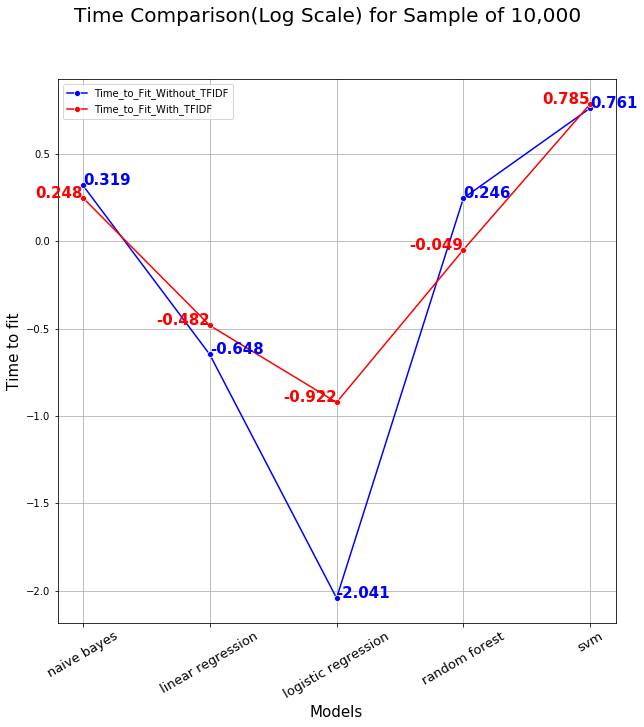

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Create dataframe

df_sample10000.loc['Time_to_Fit_Without_TFIDF_log']= df_sample10000.loc['time_without_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample10000.loc['Time_to_Fit_With_TFIDF_log']= df_sample10000.loc['time_with_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample10000.loc['Time_to_Fit_Without_TFIDF_string']=df_sample10000.loc['Time_to_Fit_Without_TFIDF_log'].apply(str)
df_sample10000.loc['Time_to_Fit_With_TFIDF_string']=df_sample10000.loc['Time_to_Fit_With_TFIDF_log'].apply(str)

df_sample10000.head(10)

df_sample10000trans=df_sample10000.transpose()

df_sample10000trans['Model']=['naive bayes','linear regression','logistic regression', 'random forest', 'svm']

df_sample10000trans['Time_to_Fit_With_TFIDF_log'] = df_sample10000trans['Time_to_Fit_With_TFIDF_log'].map(lambda a: float(a))
df_sample10000trans['Time_to_Fit_Without_TFIDF_log'] = df_sample10000trans['Time_to_Fit_Without_TFIDF_log'].map(lambda a: float(a))

df_sample10000trans.info()

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Time Comparison(Log Scale) for Sample of 10,000', fontsize=20)
# basic plot
# p1 = sns.lineplot(data=df_sample10000trans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log")

p1 = sns.lineplot(data=df_sample10000trans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log", color="blue", label="Time_to_Fit_Without_TFIDF", linestyle="-", marker = 'o')
p2 = sns.lineplot(data=df_sample10000trans, x= 'Model', y="Time_to_Fit_With_TFIDF_log", color="red", label="Time_to_Fit_With_TFIDF", linestyle="-", marker ='o', ci = 68)


# add annotations one by one with a loop
for line in range(0,df_sample10000trans.shape[0]):
 p1.text(df_sample10000trans.index[line], df_sample10000trans.Time_to_Fit_Without_TFIDF_log[line],df_sample10000trans.Time_to_Fit_Without_TFIDF_string[line], horizontalalignment='left', size='medium', color='blue', weight='semibold', fontsize = 15 )
 p2.text(df_sample10000trans.Model[line], df_sample10000trans.Time_to_Fit_With_TFIDF_log[line], df_sample10000trans.Time_to_Fit_With_TFIDF_string[line], horizontalalignment='right', size='medium', color='red', weight='semibold' ,fontsize = 15 )
 p1.set_xticklabels(rotation=30, labels=df_sample10000trans['Model'], fontsize=13)

ax.set_xlabel(xlabel='Models', fontsize=15)
ax.set_ylabel(ylabel='Time to fit',fontsize=15)
ax.grid()
ax.legend()
#%matplotlib inline

In [316]:
df_sample10000trans.drop(index='linear regression', inplace=True)

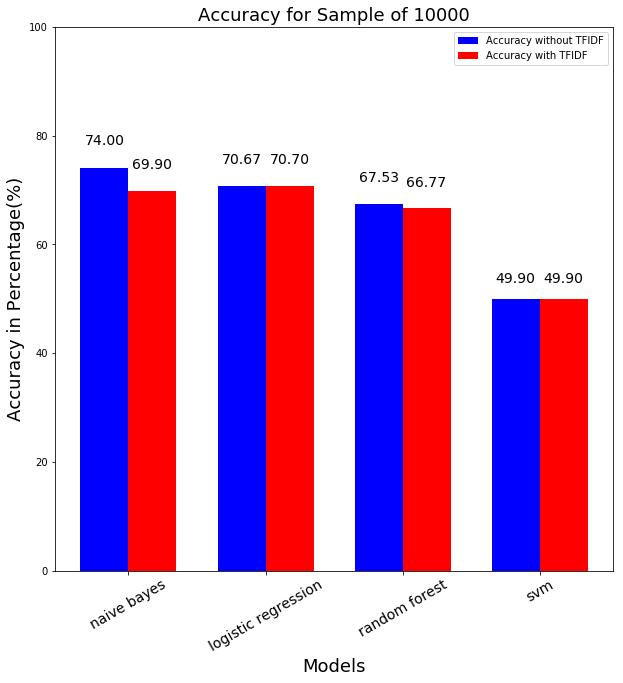

In [317]:
import numpy as np
import matplotlib.pyplot as plt

X = df_sample10000trans['Model']
Y = df_sample10000trans['accuracy_without_tfidf'].apply(lambda a: float(a*100))
Z = df_sample10000trans['accuracy_with_tfidf'].apply(lambda a: float(a*100))
_X = np.arange(len(X))



# N = 5
# men_means = (20, 35, 30, 35, 27)
# men_std = (2, 3, 4, 1, 2)

# ind = np.arange(N)  # the x locations for the groups
# width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize = (10,10))
rects1 = ax.bar(_X, Y, 0.35, color='blue')

# women_means = (25, 32, 34, 20, 25)
# women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(_X + 0.35, Z, 0.35, color='red')

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy in Percentage(%)', fontsize=18)
ax.set_xlabel('Models', fontsize=18)
ax.set_title('Accuracy for Sample of 10000', fontsize=18)
ax.set_xticks(_X + 0.35 / 2)
ax.set_xticklabels(df_sample10000trans['Model'], rotation=30, fontsize=14)
ax.set_ylim(0,100)
ax.legend((rects1[0], rects2[0]), ('Accuracy without TFIDF', 'Accuracy with TFIDF'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, 1.05*height,'%.2f' % float(height),ha='center', va='bottom', fontsize=14)

autolabel(rects1)
autolabel(rects2)

plt.show()

## Analysis for Sample of 60K

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, naive bayes to svm
Data columns (total 9 columns):
time_with_tfidf                     5 non-null object
time_without_tfidf                  5 non-null object
accuracy_with_tfidf                 4 non-null object
accuracy_without_tfidf              4 non-null object
Time_to_Fit_Without_TFIDF_log       5 non-null float64
Time_to_Fit_With_TFIDF_log          5 non-null float64
Time_to_Fit_Without_TFIDF_string    5 non-null object
Time_to_Fit_With_TFIDF_string       5 non-null object
Model                               5 non-null object
dtypes: float64(2), object(7)
memory usage: 560.0+ bytes


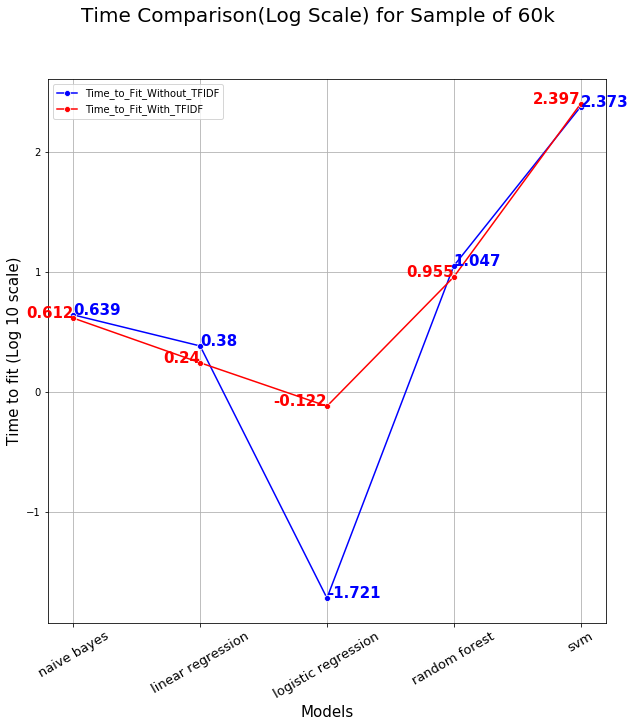

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Create dataframe

df_sample60k.loc['Time_to_Fit_Without_TFIDF_log']= df_sample60k.loc['time_without_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample60k.loc['Time_to_Fit_With_TFIDF_log']= df_sample60k.loc['time_with_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample60k.loc['Time_to_Fit_Without_TFIDF_string']=df_sample60k.loc['Time_to_Fit_Without_TFIDF_log'].apply(str)
df_sample60k.loc['Time_to_Fit_With_TFIDF_string']=df_sample60k.loc['Time_to_Fit_With_TFIDF_log'].apply(str)

df_sample60k.head(10)

df_sample60ktrans=df_sample60k.transpose()

df_sample60ktrans['Model']=['naive bayes','linear regression','logistic regression', 'random forest', 'svm']

df_sample60ktrans['Time_to_Fit_With_TFIDF_log'] = df_sample60ktrans['Time_to_Fit_With_TFIDF_log'].map(lambda a: float(a))
df_sample60ktrans['Time_to_Fit_Without_TFIDF_log'] = df_sample60ktrans['Time_to_Fit_Without_TFIDF_log'].map(lambda a: float(a))

df_sample60ktrans.info()

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Time Comparison(Log Scale) for Sample of 60k', fontsize=20)
# basic plot
# p1 = sns.lineplot(data=df_sample10000trans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log")

p1 = sns.lineplot(data=df_sample60ktrans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log", color="blue", label="Time_to_Fit_Without_TFIDF", linestyle="-", marker = 'o')
p2 = sns.lineplot(data=df_sample60ktrans, x= 'Model', y="Time_to_Fit_With_TFIDF_log", color="red", label="Time_to_Fit_With_TFIDF", linestyle="-", marker ='o', ci = 68)


# add annotations one by one with a loop
for line in range(0,df_sample60ktrans.shape[0]):
 p1.text(df_sample60ktrans.index[line], df_sample60ktrans.Time_to_Fit_Without_TFIDF_log[line],df_sample60ktrans.Time_to_Fit_Without_TFIDF_string[line], horizontalalignment='left', size='medium', color='blue', weight='semibold', fontsize = 15 )
 p2.text(df_sample60ktrans.Model[line], df_sample60ktrans.Time_to_Fit_With_TFIDF_log[line], df_sample60ktrans.Time_to_Fit_With_TFIDF_string[line], horizontalalignment='right', size='medium', color='red', weight='semibold' ,fontsize = 15 )
 p1.set_xticklabels(rotation=30, labels=df_sample60ktrans['Model'], fontsize=13)

ax.set_xlabel(xlabel='Models', fontsize=15)
ax.set_ylabel(ylabel='Time to fit (Log 10 scale)',fontsize=15)
ax.grid()
ax.legend()
#%matplotlib inline

In [319]:
df_sample60ktrans.drop(index='linear regression', inplace=True)

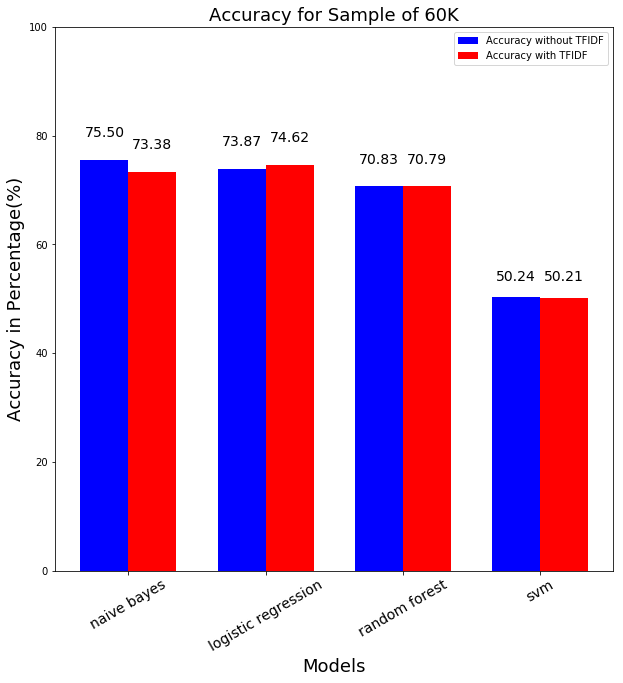

In [320]:
import numpy as np
import matplotlib.pyplot as plt

X = df_sample60ktrans['Model']
Y = df_sample60ktrans['accuracy_without_tfidf'].apply(lambda a: float(a*100))
Z = df_sample60ktrans['accuracy_with_tfidf'].apply(lambda a: float(a*100))
_X = np.arange(len(X))


fig, ax = plt.subplots(figsize = (10,10))
rects1 = ax.bar(_X, Y, 0.35, color='blue')

rects2 = ax.bar(_X + 0.35, Z, 0.35, color='red')

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy in Percentage(%)', fontsize=18)
ax.set_xlabel('Models', fontsize=18)
ax.set_title('Accuracy for Sample of 60K', fontsize=18)
ax.set_xticks(_X + 0.35 / 2)
ax.set_xticklabels(df_sample60ktrans['Model'], rotation=30, fontsize=14)
ax.set_ylim(0,100)
ax.legend((rects1[0], rects2[0]), ('Accuracy without TFIDF', 'Accuracy with TFIDF'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, 1.05*height,'%.2f' % float(height),ha='center', va='bottom', fontsize=14)

autolabel(rects1)
autolabel(rects2)

plt.show()

## Analysis for Sample of 80K

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, naive bayes to svm
Data columns (total 9 columns):
time_with_tfidf                     5 non-null object
time_without_tfidf                  5 non-null object
accuracy_with_tfidf                 4 non-null object
accuracy_without_tfidf              4 non-null object
Time_to_Fit_Without_TFIDF_log       5 non-null float64
Time_to_Fit_With_TFIDF_log          5 non-null float64
Time_to_Fit_Without_TFIDF_string    5 non-null object
Time_to_Fit_With_TFIDF_string       5 non-null object
Model                               5 non-null object
dtypes: float64(2), object(7)
memory usage: 560.0+ bytes


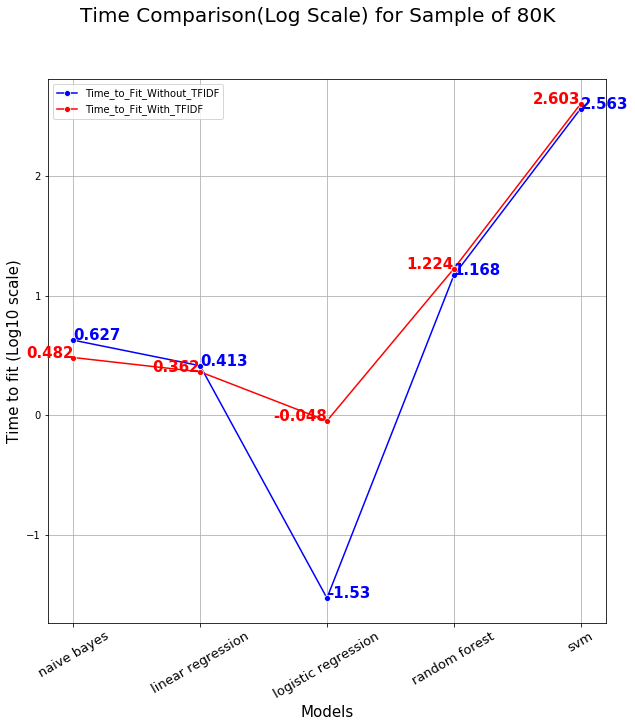

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Create dataframe

df_sample80k.loc['Time_to_Fit_Without_TFIDF_log']= df_sample80k.loc['time_without_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample80k.loc['Time_to_Fit_With_TFIDF_log']= df_sample80k.loc['time_with_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample80k.loc['Time_to_Fit_Without_TFIDF_string']=df_sample80k.loc['Time_to_Fit_Without_TFIDF_log'].apply(str)
df_sample80k.loc['Time_to_Fit_With_TFIDF_string']=df_sample80k.loc['Time_to_Fit_With_TFIDF_log'].apply(str)

df_sample80k.head(10)

df_sample80ktrans=df_sample80k.transpose()

df_sample80ktrans['Model']=['naive bayes','linear regression','logistic regression', 'random forest', 'svm']

df_sample80ktrans['Time_to_Fit_With_TFIDF_log'] = df_sample80ktrans['Time_to_Fit_With_TFIDF_log'].map(lambda a: float(a))
df_sample80ktrans['Time_to_Fit_Without_TFIDF_log'] = df_sample80ktrans['Time_to_Fit_Without_TFIDF_log'].map(lambda a: float(a))

df_sample80ktrans.info()

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Time Comparison(Log Scale) for Sample of 80K', fontsize=20)
# basic plot
# p1 = sns.lineplot(data=df_sample10000trans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log")

p1 = sns.lineplot(data=df_sample80ktrans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log", color="blue", label="Time_to_Fit_Without_TFIDF", linestyle="-", marker = 'o')
p2 = sns.lineplot(data=df_sample80ktrans, x= 'Model', y="Time_to_Fit_With_TFIDF_log", color="red", label="Time_to_Fit_With_TFIDF", linestyle="-", marker ='o', ci = 68)


# add annotations one by one with a loop
for line in range(0,df_sample80ktrans.shape[0]):
 p1.text(df_sample80ktrans.index[line], df_sample80ktrans.Time_to_Fit_Without_TFIDF_log[line],df_sample80ktrans.Time_to_Fit_Without_TFIDF_string[line], horizontalalignment='left', size='medium', color='blue', weight='semibold', fontsize = 15 )
 p2.text(df_sample80ktrans.Model[line], df_sample80ktrans.Time_to_Fit_With_TFIDF_log[line], df_sample80ktrans.Time_to_Fit_With_TFIDF_string[line], horizontalalignment='right', size='medium', color='red', weight='semibold' ,fontsize = 15 )
 p1.set_xticklabels(rotation=30, labels=df_sample80ktrans['Model'], fontsize=13)

ax.set_xlabel(xlabel='Models', fontsize=15)
ax.set_ylabel(ylabel='Time to fit (Log10 scale)',fontsize=15)
ax.grid()
ax.legend()
#%matplotlib inline

In [322]:
df_sample80ktrans.drop(index='linear regression', inplace=True)

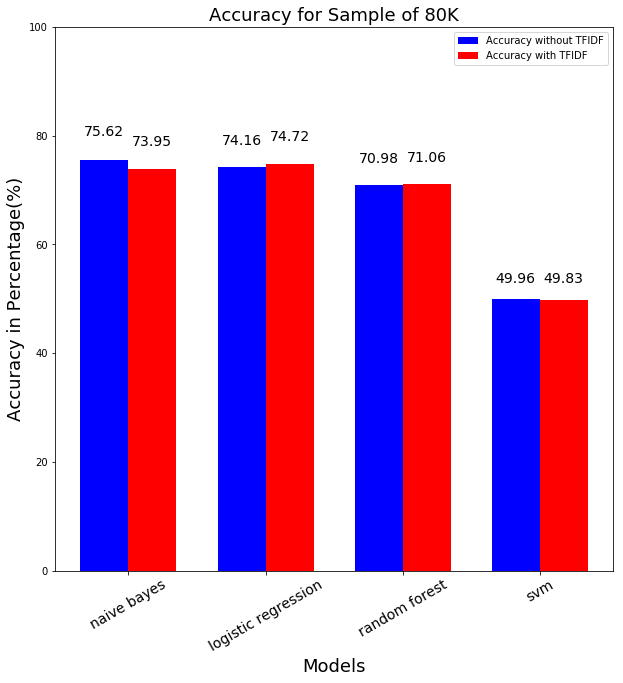

In [323]:
import numpy as np
import matplotlib.pyplot as plt

X = df_sample80ktrans['Model']
Y = df_sample80ktrans['accuracy_without_tfidf'].apply(lambda a: float(a*100))
Z = df_sample80ktrans['accuracy_with_tfidf'].apply(lambda a: float(a*100))
_X = np.arange(len(X))


fig, ax = plt.subplots(figsize = (10,10))
rects1 = ax.bar(_X, Y, 0.35, color='blue')

rects2 = ax.bar(_X + 0.35, Z, 0.35, color='red')

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy in Percentage(%)', fontsize=18)
ax.set_xlabel('Models', fontsize=18)
ax.set_title('Accuracy for Sample of 80K', fontsize=18)
ax.set_xticks(_X + 0.35 / 2)
ax.set_xticklabels(df_sample80ktrans['Model'], rotation=30, fontsize=14)
ax.set_ylim(0,100)
ax.legend((rects1[0], rects2[0]), ('Accuracy without TFIDF', 'Accuracy with TFIDF'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, 1.05*height,'%.2f' % float(height),ha='center', va='bottom', fontsize=14)

autolabel(rects1)
autolabel(rects2)

plt.show()

## Analysis for Sample of 100K

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, naive bayes to svm
Data columns (total 9 columns):
time_with_tfidf                     5 non-null object
time_without_tfidf                  5 non-null object
accuracy_with_tfidf                 4 non-null object
accuracy_without_tfidf              4 non-null object
Time_to_Fit_Without_TFIDF_log       5 non-null float64
Time_to_Fit_With_TFIDF_log          5 non-null float64
Time_to_Fit_Without_TFIDF_string    5 non-null object
Time_to_Fit_With_TFIDF_string       5 non-null object
Model                               5 non-null object
dtypes: float64(2), object(7)
memory usage: 560.0+ bytes


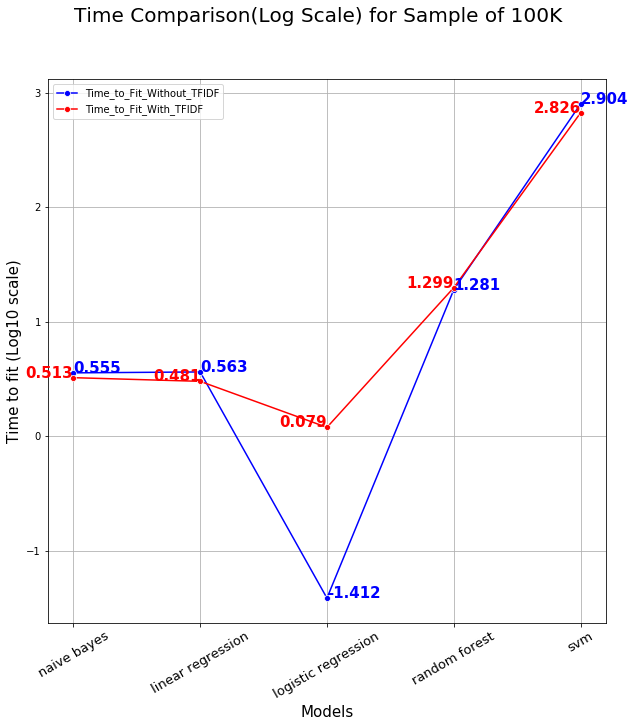

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Create dataframe

df_sample100k.loc['Time_to_Fit_Without_TFIDF_log']= df_sample100k.loc['time_without_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample100k.loc['Time_to_Fit_With_TFIDF_log']= df_sample100k.loc['time_with_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample100k.loc['Time_to_Fit_Without_TFIDF_string']=df_sample100k.loc['Time_to_Fit_Without_TFIDF_log'].apply(str)
df_sample100k.loc['Time_to_Fit_With_TFIDF_string']=df_sample100k.loc['Time_to_Fit_With_TFIDF_log'].apply(str)

df_sample100k.head(10)

df_sample100ktrans=df_sample100k.transpose()

df_sample100ktrans['Model']=['naive bayes','linear regression','logistic regression', 'random forest', 'svm']

df_sample100ktrans['Time_to_Fit_With_TFIDF_log'] = df_sample100ktrans['Time_to_Fit_With_TFIDF_log'].map(lambda a: float(a))
df_sample100ktrans['Time_to_Fit_Without_TFIDF_log'] = df_sample100ktrans['Time_to_Fit_Without_TFIDF_log'].map(lambda a: float(a))

df_sample100ktrans.info()

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Time Comparison(Log Scale) for Sample of 100K', fontsize=20)
# basic plot
# p1 = sns.lineplot(data=df_sample10000trans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log")

p1 = sns.lineplot(data=df_sample100ktrans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log", color="blue", label="Time_to_Fit_Without_TFIDF", linestyle="-", marker = 'o')
p2 = sns.lineplot(data=df_sample100ktrans, x= 'Model', y="Time_to_Fit_With_TFIDF_log", color="red", label="Time_to_Fit_With_TFIDF", linestyle="-", marker ='o', ci = 68)


# add annotations one by one with a loop
for line in range(0,df_sample100ktrans.shape[0]):
 p1.text(df_sample100ktrans.index[line], df_sample100ktrans.Time_to_Fit_Without_TFIDF_log[line],df_sample100ktrans.Time_to_Fit_Without_TFIDF_string[line], horizontalalignment='left', size='medium', color='blue', weight='semibold', fontsize = 15 )
 p2.text(df_sample100ktrans.Model[line], df_sample100ktrans.Time_to_Fit_With_TFIDF_log[line], df_sample100ktrans.Time_to_Fit_With_TFIDF_string[line], horizontalalignment='right', size='medium', color='red', weight='semibold' ,fontsize = 15 )
 p1.set_xticklabels(rotation=30, labels=df_sample100ktrans['Model'], fontsize=13)

ax.set_xlabel(xlabel='Models', fontsize=15)
ax.set_ylabel(ylabel='Time to fit (Log10 scale)',fontsize=15)
ax.grid()
ax.legend()
#%matplotlib inline

In [325]:
df_sample100ktrans.drop(index='linear regression', inplace=True)

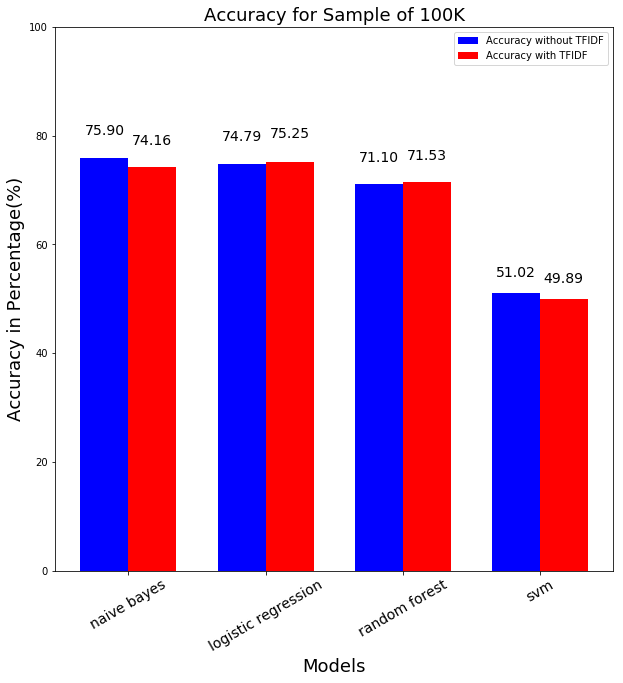

In [326]:
import numpy as np
import matplotlib.pyplot as plt

X = df_sample100ktrans['Model']
Y = df_sample100ktrans['accuracy_without_tfidf'].apply(lambda a: float(a*100))
Z = df_sample100ktrans['accuracy_with_tfidf'].apply(lambda a: float(a*100))
_X = np.arange(len(X))


fig, ax = plt.subplots(figsize = (10,10))
rects1 = ax.bar(_X, Y, 0.35, color='blue')

rects2 = ax.bar(_X + 0.35, Z, 0.35, color='red')

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy in Percentage(%)', fontsize=18)
ax.set_xlabel('Models', fontsize=18)
ax.set_title('Accuracy for Sample of 100K', fontsize=18)
ax.set_xticks(_X + 0.35 / 2)
ax.set_xticklabels(df_sample100ktrans['Model'], rotation=30, fontsize=14)
ax.set_ylim(0,100)
ax.legend((rects1[0], rects2[0]), ('Accuracy without TFIDF', 'Accuracy with TFIDF'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, 1.05*height,'%.2f' % float(height),ha='center', va='bottom', fontsize=14)

autolabel(rects1)
autolabel(rects2)

plt.show()

In [327]:
# df_sample100k.loc['time_with_tfidf'].plot(kind = 'bar')

In [328]:
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [329]:
# from sklearn.model_selection import GridSearchCV

In [330]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)